In [1]:
import numpy as np
import os,sys
from scipy import misc
%matplotlib inline
from matplotlib import pyplot as plt

OK, we need to read in some data. I wanted to get some data that look human-understandable, and crushed out a lot of the amplitude variation we see in the ISM. I am just going to use my "promotional" ISM images from GALFA-HI DR2 to start with.

In [2]:
#Let's test reading a PNG
whereami ='/Users/jegpeek/'
path = 'Dropbox/Documents/batch/GALFA/DR2/testmovie/allsky/'
file = 'allsky988.png'

In [3]:
#read in all the data
# I am going to break things down into 32x32s, but do an offset so we don't get exact match ups of the same features...
xwid= 10800
ywid = 1180

nacross = np.floor(xwid/32.0)
f1 = 970
f2 = 1077
ntall = np.floor(ywid/32.0)
nfiles = (1077-970+1)
filenums = np.linspace(f1,f2, nfiles)
filenames =[whereami + path + 'allsky%0.4i.png' % i for i in filenums]

leftoverx = (xwid-np.floor(xwid/32)*32)
leftovery = (ywid -np.floor(ywid/32)*32)
nimgx = np.floor(xwid/32)
nimgy = np.floor(ywid/32)

allimg = np.zeros([32, 32, 3, nfiles, nimgx, nimgy])

for i, f in enumerate(filenames):
    data = misc.imread(f)
    # some offsets
    xoff = np.mod(i,leftoverx)
    yoff = np.mod(i,leftovery)
    for x in np.arange(nimgx):
        for y in np.arange(nimgy):
            allimg[:,:,:, i, x, y] = data[yoff+y*32:yoff+(y+1)*32,xoff+x*32:xoff+(x+1)*32, :]


/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jegpeek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


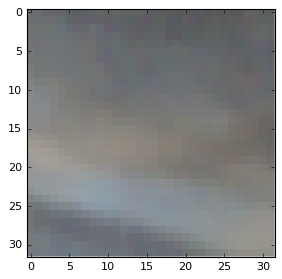

In [37]:
plt.imshow(allimg[:, :, :, 20, 20, 0].astype('uint8'), interpolation='none', clim=(0, 255))

119.0


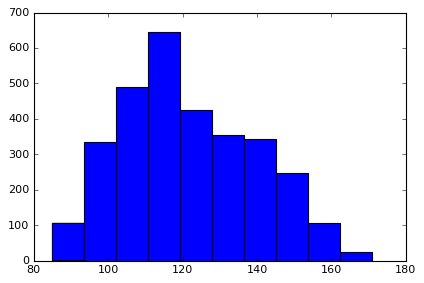

In [38]:
plt.hist(allimg[:, :, :, 20, 20, 0].reshape(32*32*3))
print(np.median(allimg[:, :, :, 20, 20, 0]))

In [40]:
test = allimg[:, :, :, 0, 0, 0].astype('uint8')

In [13]:
misc.imsave('test.png', image[600:640, 2000:2040,  :])